# Clasificación de tumores de mama


In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## **1. Obteniendo el Dataframe**

In [2]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


In [3]:

# Descargar datos id 15
df_0= fetch_ucirepo(id=15)
# - Es un archivo dotdict 

# Extracción de caracteristicas y etiquetas a partir de la clave "data"

X = df_0.data.features
Y = df_0.data.targets

# Concatenando Dataframes
df = pd.concat([X, Y], axis=1)


## **2. EDA**
### **2.1. Sondeo inicial de la base de datos**

#### Información a partir de "Variables"

A continuación, se explora inicialmente el conjunto de datos df_0, utilizando el atributo variables proporcionado por los creadores de la base de datos. Este atributo contiene información descriptiva sobre la estructura y las características de los datos en df_0.

In [4]:
print(df_0.variables)

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

Con base en la información anterior, se identifica lo siguiente:

* Existencia de Sample_code_number que corresponde a el ID de los registros.
* 9 atributos que son tipo integer o numérico.
* Una columna tipo binario designada como el target.
* Se proporciona información significativa acerca de la interpretación de cada valor binario en el target, donde 2 representa 'benign' y 4 representa 'malignant'.
* Presencia de missing values para la variable Bare_nuclei.

#### Información a partir del Dataframe df

A continuación se extrae información directamente del Dataframe.

In [5]:
# Sondeo general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [6]:
# Valores únicos de cada variable 
for i in df.columns:
    v_u = np.unique(df[i])
    print(f"Valores únicos '{i}': {v_u}")

Valores únicos 'Clump_thickness': [ 1  2  3  4  5  6  7  8  9 10]
Valores únicos 'Uniformity_of_cell_size': [ 1  2  3  4  5  6  7  8  9 10]
Valores únicos 'Uniformity_of_cell_shape': [ 1  2  3  4  5  6  7  8  9 10]
Valores únicos 'Marginal_adhesion': [ 1  2  3  4  5  6  7  8  9 10]
Valores únicos 'Single_epithelial_cell_size': [ 1  2  3  4  5  6  7  8  9 10]
Valores únicos 'Bare_nuclei': [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
Valores únicos 'Bland_chromatin': [ 1  2  3  4  5  6  7  8  9 10]
Valores únicos 'Normal_nucleoli': [ 1  2  3  4  5  6  7  8  9 10]
Valores únicos 'Mitoses': [ 1  2  3  4  5  6  7  8 10]
Valores únicos 'Class': [2 4]


In [7]:
# Vista inicial
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


Con base en las tablas anteriores, se identifica lo siguiente:

* 9 de las variables son tipo int64 y una (Bare_nuclei) es float64.
* Al observar los primeros registros de Bare_nuclei y los valores unicos, se nota que en realidad son tipo int solo que tienen la presencia del punto.
* Los valores unicos para cada variable van de 1 a 10 y al observar la naturaleza y el nombre de estas se considera que son variables categoricas ordinales.
* Se observa la presencia de valores NAN en la variable Bare_nuclei.
* Hay 699 registros, 9 variables y la columna del target.
  

### **2.2. Medidas de tendencia central y desviación**

A continuación, se presenta un resumen estadístico que calcula medidas de centralidad y desviación. El objetivo es obtener información clave sobre la distribución y variabilidad de los datos.

In [8]:
df.mode()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1,1,1,1,2,1.0,2,1,1,2


In [9]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


A partir de la información anterior se realizan las sigueintes observaciones:

* En relación con la media, la desviación estandar y el valor max y min se sugiere que existe una dispersión en los datos, indicando que los valores están esparcidos alrededor de la media y no son tan consistentes.
* Respecto a la moda se puede inferir que la mayoria tendran una distribucion con cola larga hacia la derecha.
* Para cinco de las variables, se observa que la desviación estándar es menor que la media. Esta particularidad sugiere que, para estos atributos, la distribución de los datos es más concentrada, y hay menos dispersión entre los valores.
* Aproximadamente el 74% de los registros para cada variable está por debajo de 6, 5, 4 o 1, esto muestra que hay pocos valores en cada caso con valores cercanos a 10.



### **2.3. Tratamiento de valores nulos**


A continuación, se procede a identificar la cantidad de valores nulos presentes en la columna 'Bare_nuclei'. Esta información es esencial para determinar el tratamiento más adecuado que se debe aplicar a estos valores faltantes.

In [10]:
# Cantidad de valores faltantres por cada atributo
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

* Se confirma que el único atributo con valores faltantes es 'Bare_nuclei', presentando un total de 16 valores nulos.
* Solo el 2.29% de los datos en esa columna son nulos o faltantes.
* Ya que el porcentaje de valores faltantes es bajo, una opción sencilla es imputar los valores nulos con la moda.

In [11]:
# Imputación con moda de 'Bare_nuclei'
m = df['Bare_nuclei'].mode()[0] 
df['Bare_nuclei'].fillna(m, inplace=True) 

# Cambio de tipo float de Bare_nuclei a tipo int
df['Bare_nuclei'] = df['Bare_nuclei'].astype(int)


### **2.4. Diagrama de bigotes**


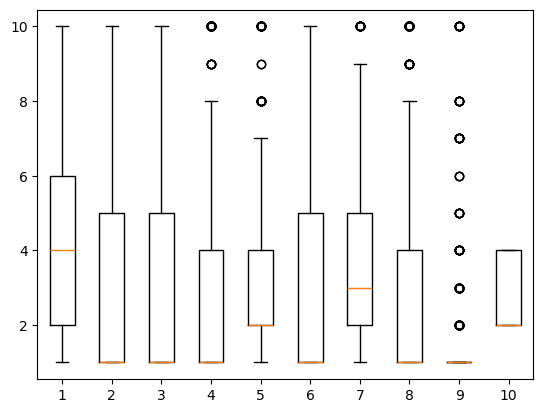

In [12]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot(df)
plt.show()

A partir del análisis de los diagramas de caja anteriores, se pueden realizar varias observaciones sobre la distribución de los datos en los diferentes atributos:

* Atributos 2, 3, 4, 6 y 8:

En estos atributos, el 50% de sus valores es igual a uno, y la moda también es uno. La mediana ubicada sobre uno sugiere una distribución con una cola hacia la derecha, indicando que la mayoría de los datos se concentran en valores bajos, pero hay algunos valores más altos que afectan la media y la cola de la distribución. Ademas se observa la presencia de valores atípicos en los atributos 4 y 8, concentrados en los valores 9 y 10.

* Atributo 1:

Este atributo muestra una distribución que se asemeja más a una distribución simétrica en comparación con otros. Aunque los bigotes no son simétricos, la mediana está ubicada en la mitad de la caja.

* Atributo 9:

En el caso del atributo 9, se observa una situación interesante. Aunque muestra una dispersión baja, indicando que la mayoría de sus valores se concentran alrededor de la media y la mayoria de sus valores son iguales a la mediana o basicamente la gran mayoria de sus valores es 1, se presenta una peculiaridad: la presencia de varios valores atípicos.

* Atributos 5 y 7:

Ambos atributos muestran una distribución con una cola más pronunciada hacia la derecha, indicando un desbalance en los valores de los datos hacia valores más altos. 

* Es importante destacar que en este estudio, la interpretación de los valores que podrían parecer "atípicos" depende significativamente del contexto y del conocimiento del dominio del problema. Ya que estos valores son posibles aunque poco frecuentes, debido a la naturaleza de las variables, las cuales son categóricas ordinales en lugar de ser continuas.

### **2.5. Correlacion Spearman**


In [13]:
from scipy.stats import spearmanr

# Calcular la matriz de correlación de Spearman
C_M = df.corr(method='spearman')
C_M

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.666463,0.664121,0.541593,0.583979,0.585673,0.538093,0.570398,0.418717,0.682452
Uniformity_of_cell_size,0.666463,1.000000,0.891904,0.742517,0.787159,0.760558,0.719330,0.757199,0.508780,0.855487
Uniformity_of_cell_shape,0.664121,0.891904,1.000000,0.711730,0.759234,0.740620,0.692316,0.725268,0.472749,0.836394
Marginal_adhesion,0.541593,0.742517,0.711730,1.000000,0.667809,0.693674,0.624515,0.634310,0.446992,0.727995
Single_epithelial_cell_size,0.583979,0.787159,0.759234,0.667809,1.000000,0.688988,0.639507,0.705997,0.480255,0.762731
Bare_nuclei,0.585673,0.760558,0.740620,0.693674,0.688988,1.000000,0.669132,0.649397,0.478049,0.830774
Bland_chromatin,0.538093,0.719330,0.692316,0.624515,0.639507,0.669132,1.000000,0.662309,0.386944,0.740350
Normal_nucleoli,0.570398,0.757199,0.725268,0.634310,0.705997,0.649397,0.662309,1.000000,0.504140,0.743823
Mitoses,0.418717,0.508780,0.472749,0.446992,0.480255,0.478049,0.386944,0.504140,1.000000,0.526766
Class,0.682452,0.855487,0.836394,0.727995,0.762731,0.830774,0.740350,0.743823,0.526766,1.000000


In [14]:
# Umbral para la correlación alta
U= 0.75

ATRI_CORS= set()
for i in range(len(C_M.columns)):
    for j in range(i):
        if abs(C_M.iloc[i, j]) > U:
            ATRI = C_M.columns[i]
            ATRI_COR = C_M.columns[j]
            ATRI_CORS.add((ATRI, ATRI_COR))

print("Pares de atributos correlacionados:")
print(ATRI_CORS)

Pares de atributos correlacionados:
{('Normal_nucleoli', 'Uniformity_of_cell_size'), ('Class', 'Uniformity_of_cell_shape'), ('Single_epithelial_cell_size', 'Uniformity_of_cell_shape'), ('Class', 'Single_epithelial_cell_size'), ('Class', 'Uniformity_of_cell_size'), ('Single_epithelial_cell_size', 'Uniformity_of_cell_size'), ('Class', 'Bare_nuclei'), ('Bare_nuclei', 'Uniformity_of_cell_size'), ('Uniformity_of_cell_shape', 'Uniformity_of_cell_size')}



Variables a eliminar:

* Uniformity_of_cell_size
* Uniformity_of_cell_shape



In [15]:
# Eliminar variables
df = df.drop(['Uniformity_of_cell_size', 'Uniformity_of_cell_shape'], axis=1)

### **2.6. Analisis de balanceo de clases**

In [16]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

* Hay 458 registros para la clase "benign" y 241 para la clase "malignant". Esta diferencia considerable en la cantidad de registros resulta en un desbalance significativo, donde el 65.5 % de los registros pertenecen a la clase "benign" y el 34.5 % a "malignant". Este desbalance, en lugar de aproximarse a una distribución equitativa del 50/50, podría generar una predisposición hacia la clasificación de un registro como "benign".


In [17]:
# Se hace balanceo de clases eliminando registros de la clase mayoritaria
g = df.groupby('Class')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


Clump_thickness  Marginal_adhesion  Single_epithelial_cell_size  \
Class                                                                        
2     0                  1                  1                            2   
      1                  1                  1                            3   
      2                  1                  1                            2   
      3                  3                  3                            2   
      4                  6                  1                            2   
...                    ...                ...                          ...   
4     236               10                  6                            8   
      237                9                  6                            4   
      238                7                  5                            3   
      239                5                  2                            5   
      240                8                  6                            6   

           Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class  
Class                                                                     
2     0              1                2                1        1      2  
      1              1                1                1        1      2  
      2              1                1                1        1      2  
      3              3                3                1        1      2  
      4              1                3                1        1      2  
...                ...              ...              ...      ...    ...  
4     236            4                8                5        1      4  
      237           10                7                7        2      4  
      238           10                9               10        2      4  
      239           10                4                3        1      4  
      240            3               10               10        1      4  

[482 rows x 8 columns]

In [18]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['Class'].value_counts())

Class
2    241
4    241
Name: count, dtype: int64


## **3. Modelado y Validación**
En esta etapa se van a utilizar los datos para entrenar un modelo que determine si un tumor es benigno o maligno.

1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

### **3.1. División de los datos**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('Class', axis=1), dataBal.Class, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(337, 7) (337,)
(145, 7) (145,)


### **3.2. Entrenamiento del modelo de clasificación por regresión logistica**

In [20]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

L_G = LogisticRegression()
L_G.fit(X_train, y_train)


LogisticRegression()

#### **3.2.1. Implementación del modelo**

En el array obtenido se puede observar las predicciones que hizo el modelo

In [21]:
# Aplicación del modelo construido a los datos de test
predictions = L_G.predict(X_test)
predictions

array([4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4], dtype=int64)

* Detrás de estas predicciones esta la probabilidad de que sea de una clase o la otra, solo que estas probabilidades se filtran por medio de un umbral para al final obtener a que clase pertenece la clasificación.

#### **Accuracy**


In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9517241379310345

#### **Validaciòn cruzada**

En esta etapa final, se evalúa el modelo mediante validación cruzada con 5 folds. Esta técnica proporciona una evaluación más confiable al entrenar y probar el modelo en diferentes subconjuntos de datos. 

In [23]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 folds
cross = cross_val_score(L_G, X_train, y_train, cv=5, scoring='accuracy')

print("Accuracy por fold:", cross)
print("Accuracy promedio:", cross.mean())

Accuracy por fold: [0.98529412 0.95588235 0.98507463 0.97014925 0.94029851]
Accuracy promedio: 0.9673397717295874



A partir de los resultados obtenidos mediante la validación cruzada, se destaca un accuracy promedio de 0.955. Este valor refleja la precisión media del modelo a lo largo de las diferentes iteraciones de la validación cruzada. Una puntuación de 0.96 sugiere que, en general, el modelo ha demostrado una capacidad consistente para realizar clasificaciones precisas en el conjunto de entrenamiento.

#### **Matriz de confusión**

array([[57,  4],
       [ 3, 81]], dtype=int64)

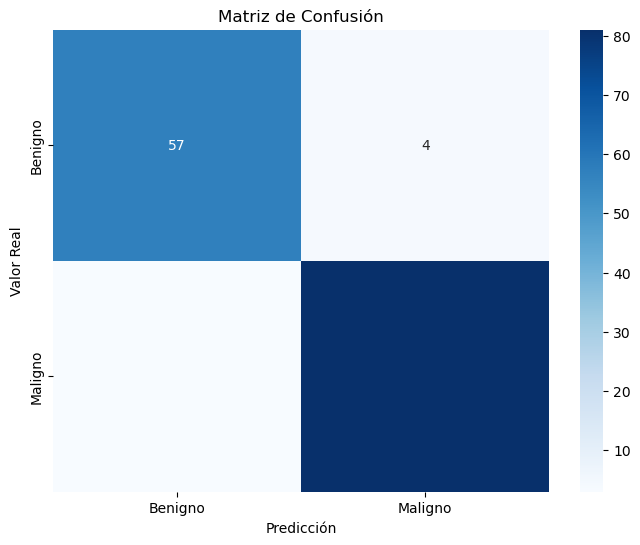

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, cmap="Blues", fmt="d", xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

CM


In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           2       0.95      0.93      0.94        61
           4       0.95      0.96      0.96        84

    accuracy                           0.95       145
   macro avg       0.95      0.95      0.95       145
weighted avg       0.95      0.95      0.95       145



### **3.3. Entrenamiento e implementación del modelo de clasificación SVM**

In [30]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm_pre = svm.predict(X_test)
svm_re = classification_report(y_test, svm_pre)
print("Reporte de clasificación para SVM:\n", svm_re)

Reporte de clasificación para SVM:
               precision    recall  f1-score   support

           2       0.98      0.89      0.93        61
           4       0.92      0.99      0.95        84

    accuracy                           0.94       145
   macro avg       0.95      0.94      0.94       145
weighted avg       0.95      0.94      0.94       145



In [32]:
CM1 = confusion_matrix(y_test, svm_pre)
CM1


array([[54,  7],
       [ 1, 83]], dtype=int64)

### **3.4. Entrenamiento e implementación del modelo de clasificación RF**

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pre = RF.predict(X_test)

RF_re= classification_report(y_test, RF_pre)
print("Reporte de clasificación para Random Forest:\n", RF_re)

Reporte de clasificación para Random Forest:
               precision    recall  f1-score   support

           2       0.95      0.92      0.93        61
           4       0.94      0.96      0.95        84

    accuracy                           0.94       145
   macro avg       0.95      0.94      0.94       145
weighted avg       0.94      0.94      0.94       145



In [35]:
CM2 = confusion_matrix(y_test, RF_pre)
CM2

array([[56,  5],
       [ 5, 79]], dtype=int64)

## **4. Análisis de resultados**

* Con la regresión Logística se obtuvo el mejor desempeño. La regresión logística es particularmente efectiva para problemas de clasificación binaria y variables predictoras categóricas ordinales, como en este caso. Su capacidad para modelar probabilidades y su simplicidad en la interpretación hacen que sea adecuado para identificar relaciones entre las variables predictoras y la variable objetivo. La combinación de estos factores probablemente contribuyó a su alto rendimiento en este problema.

* El SVM se desempeñó bien, especialmente en la clasificación de tumores malignos. El SVM es conocido por su capacidad para encontrar un hiperplano óptimo que maximiza la separación entre las clases. En casos donde los datos son bien separables en el espacio de características, el SVM puede ofrecer un rendimiento robusto. Sin embargo, su rendimiento puede ser sensible a la selección de parámetros y al tipo de kernel utilizado, lo cual puede explicar por qué no superó a la regresión logística en este caso.

* Aunque el Random Forest no fue el mejor modelo, todavía produjo resultados aceptables. El RF es un método de ensamble que construye múltiples árboles de decisión y combina sus resultados para mejorar la precisión y reducir el riesgo de sobreajuste. Sin embargo, su naturaleza aleatoria puede introducir variabilidad en el rendimiento y la interpretación de los resultados puede ser menos clara comparada con la regresión logística y SVM. Además, el RF puede requerir una optimización más cuidadosa de los hiperparámetros y de la organización de las variables en los árboles para alcanzar su máximo potencial.